<h1> Комментарий тимлида </h1>

👋 **Приветствую, Алексей!** 

✨ Поздравляю с началом работы над финальным проектом!

Меня зовут Арсен Абдулин и я буду проверять твою работу. Предлагаю общаться на «ты», если не против=)

При проверке работ я пишу следующие комментарии:

<div class="alert alert-success">
<b>✔️ Зеленым цветом</b> отмечены удачные решения.</div>

<div class="alert alert-warning">
<b>⚠️ Желтым цветом</b> я отметил пункты, которые в следующий раз можно сделать по-другому. Одно-два таких замечания в проекте допускается, но если их много — проект следует доработать. </div>

<div class="alert alert-danger">
<b>🚫 Красным цветом</b> отмечены критические замечания, которые необходимо поправить, чтобы принять проект. </div>

Если какие-то моменты в задании для тебя были непонятны и у тебя есть ко мне вопросы — смело спрашивай 😊 Также ты можешь доработать места, где есть желтые комментарии в проекте (однако, это не обязательно).

Предлагаю работать в диалоге: если ты решишь что-то поменять по моим рекомендациям — пиши об этом (выбери для своих комментариев определенный цвет - так мне будет легче увидеть изменения). Пожалуйста не перемещай, не изменяй и не удаляй мои комментарии. Все это поможет сделать проверку твоего проекта оперативнее.

<div class="alert alert-info"> <b>ℹ️ Комментарий студента: </b> Пример комментария. </div>

# Учебный Проект → «Прогнозирование оттока клиентов»

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 00</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
    <p>Арсен, здравствуй.</p>
    <p>Спасибо за <code>вводную консультацию</code>.</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Всегда пожалуйста 👍
    
</div>

## Задача проекта

>Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Хорошо, когда есть небольшое описание проекта!
    
Можно также сформулировать цель работы
    
</div>

✅ название и описание проекта, цель проекта

## Цель проекта

Создать модель для поиска `классификации` пользователей, которые могут прекратить пользоваться услугами связи «Ниединогоразрыва.ком».

<hr>

In [1]:
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import phik

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from catboost import CatBoostClassifier
from catboost import Pool
from catboost import cv

from sklearn.model_selection import train_test_split

**Настроим вид графиков по+красоте** ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
gr_wt_cmap = mpl.colors.LinearSegmentedColormap(
    name='forest_gradient',
    segmentdata = {
        'red':   [(0.0, 0.1333333, 0.1333333),
                  (1.0, 0.1333333, 0.1333333)],
        'green': [(0.0, 0.5450980, 0.5450980),
                  (1.0, 0.5450980, 0.5450980)],
        'blue':  [(0.0, 0.1333333, 0.1333333),
                  (1.0, 0.1333333, 0.1333333)],
        'alpha': [(0.,0.,0.),
                  (1.0,1.0,1.0)]
    },
    N=256,
)

In [4]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

In [5]:
# set max columns to none
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

**Константы:**

In [6]:
RANDOM_SEED = 270223
DPI_K = custom_params['figure.dpi'] / mpl.rcParams['figure.dpi']
PX = 1/custom_params['figure.dpi']
PY_CASE = re.compile(r'(?<!^)(?<![A-Z])(?=[A-Z])')
TEST_SIZE = 0.25
UPDATED_AT = np.datetime64('2020-02-01')

**Функции:**

In [7]:
def columns_w_na(data_df):
    col_nan = data_df.columns[
            data_df.isna().any()
        ].tolist()
    df_length = len(data_df.index)

    if len(col_nan) != 0:
        print('Колонки с NaN:')
        for col in col_nan:
            count_na = len(
                    data_df.loc[data_df[col].isna()].index
                )

            print(
                '{: .2%}'.format(count_na/df_length),
                end='\t→ '
            )
            print(col, end=' → ')
            print(count_na)
    else:
        print('Пропусков NaN в наборе данных нет.\n')

In [8]:
def baisic_df_info(data_df, title='Базовая информация'):
    print(title,  '→ о наборе данных:', end='\n\n')
    print('Дубликатов:',
             len(data_df.loc[data_df.duplicated()].index),
          end='\n\n'
     )
    
    columns_w_na(data_df)
    
    data_df.info()
    
    print()
    display(
        data_df.sample(5),
        data_df.describe(),
    )

In [9]:
def to_snake_case(df_columns, pattern=PY_CASE):
    to_return  = pd.Series(df_columns).apply(
            lambda c: re.sub(pattern, '_',  c ).lower()
        )
    
    return to_return

In [10]:
def about_categories(described):
    for col in described.columns:
        top_val = described[col]['top']
        pct_usg = described[col]['freq'] / described[col]['count']
        
        if top_val == 'Yes':
            is_usng = 'используют'
        elif top_val == 'No':
            is_usng = 'не используют'
        else:
            is_usng = top_val
        
        print(
            '{:.2%}'.format(pct_usg),
            is_usng,
            col,
        )

In [11]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * PX * DPI_K
        )
    )
    return px_density

In [12]:
def plot_hist(data, title='Histogram', custom_params=custom_params, color='forestgreen'):
    
    num_col = 2
    num_row = int(
            len(data.columns) / num_col
        ) + (len(data.columns) % num_col)
    
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=num_row,
            ncols=num_col,
            figsize=(
                to_px(960), to_px(960)),
            tight_layout=True
        )
        
        for n, col_name in enumerate(data.columns):
            ax_row = int(n/2)
            ax_col = n%2
            n_bins = len(data[col_name].unique())
                
            axs[ax_row, ax_col].hist(
                data[col_name],
                bins=n_bins,
                color=color
            )
            axs[ax_row, ax_col].set_title(col_name)
        
        fig.suptitle(title, fontsize=16)
        
        if len(data.columns) % num_col:
            fig.delaxes(axs[-1, -1])

        plt.show()

<a id="compare_hist"></a>
[Apply compare_hist](#plot)

In [13]:
def compare_hist(data, title='Histogram', custom_params=custom_params):
    num_col = 1
    num_row = 2
    clmn_2_compare = list(data.columns)[0]
    
    data_stayed = total_df.loc[total_df['target'] == 0,
        clmn_2_compare
    ]
    data_exited = total_df.loc[total_df['target'] == 1,
        clmn_2_compare
    ]

    n_bins_st = len(data_stayed.unique())
    n_bins_ex = len(data_exited.unique())
                
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=num_row,
            ncols=num_col,
            figsize=(
                to_px(960), to_px(560)),
            tight_layout=True,
            sharex = True
        )
        axs[0].hist(
                data_stayed,
                bins=n_bins_st,
                color='forestgreen'
        )
        axs[0].set_title('остались')
        
        axs[1].hist(
                data_exited,
                bins=n_bins_ex,
                color='darkorange'
        )
        axs[1].set_title('ушли')

        fig.suptitle(title, fontsize=16)

        plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Отличная подготовка проекта! Здорово, что применяешь функции и глобальные настройки 👍
    
</div>

**Загружаем наборы данных**

In [14]:
try:
    contract_df = pd.read_csv(
            './datasets/contract.csv',
        )
    internet_df = pd.read_csv(
            './datasets/internet.csv',
        )
    personal_df = pd.read_csv(
            './datasets/personal.csv',
        )
    phone_df = pd.read_csv(
            './datasets/phone.csv',
        )
except FileNotFoundError:
    contract_df = pd.read_csv(
            '/datasets/final_provider/contract.csv',
        )
    internet_df = pd.read_csv(
            '/datasets/final_provider/internet.csv',
        )
    personal_df = pd.read_csv(
            '/datasets/final_provider/personal.csv',
        )
    phone_df = pd.read_csv(
            '/datasets/final_provider/phone.csv',
        )
    print('FYI datasets loaded via urls')

Сделаем названия столбцов по+красоте → `snake_case`  
Во имя Python 
<img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/files/python-logo-only.svg" alt="Python logo" width="15px"/>

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Согласен, правильное решение =)
    
</div>

In [15]:
contract_df.columns  = to_snake_case(contract_df.columns)
internet_df.columns  = to_snake_case(internet_df.columns)
personal_df.columns  = to_snake_case(personal_df.columns)
phone_df.columns  = to_snake_case(phone_df.columns)

In [16]:
baisic_df_info(contract_df, title='Контракты')

Контракты → о наборе данных:

Дубликатов: 0

Пропусков NaN в наборе данных нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
3671,8816-VXNZD,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,75.10,75.1
5055,6925-BAYGL,2015-09-01,No,Two year,No,Credit card (automatic),25.10,1275.6
6858,2685-SREOM,2017-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,89.10,2368.4
253,3282-ZISZV,2017-06-01,No,One year,No,Credit card (automatic),83.70,2633.3
6268,9746-UGFAC,2018-04-01,No,One year,No,Bank transfer (automatic),20.85,450.65


,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [17]:
contract_df['begin_date'].describe(datetime_is_numeric=True)

count           7043
unique            77
top       2014-02-01
freq             366
Name: begin_date, dtype: object

In [18]:
contract_df.loc[
        contract_df['end_date'] == 'No',
        'end_date'
    ] = pd.NaT

contract_df['end_date'] = pd.to_datetime(
        contract_df['end_date']
    )

contract_df['end_date'].dt.date

print(
    'Ушедших пользователей',
    contract_df.loc[contract_df['end_date'].notnull(), 'customer_id'].count()
)

Ушедших пользователей 1869


In [19]:
contract_df['begin_date'] = pd.to_datetime(
        contract_df['begin_date']
    )

In [20]:
display(
    contract_df.loc[
        contract_df['total_charges'] == ' '
    ]
)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,


`total_charges` «пусто» только у тех пользователей, которые:
1. заключили договор на 1 год или 2 года
2. подключились в дату вгрузки данных `2020-02-01`

In [21]:
long_term = ['Two year', 'One year']

In [22]:
long_term_idxs = contract_df.loc[
        contract_df['type'].isin(long_term)
    ].index

In [23]:
two_years_count = len(
        contract_df.loc[
            contract_df['type']=='Two year'
        ].index)
one_year_count = len(
        contract_df.loc[
            contract_df['type']=='One year'
        ].index)
monthly_count = len(
        contract_df.loc[
            contract_df['type']=='Month-to-month'
        ].index)

contracts_count = len(contract_df.index)

agriment = 'заключили договор'

In [24]:
print('Среди {:} абонентов:\n'.format(contracts_count))

print('{:.2%}'.format(two_years_count/contracts_count),
      agriment, 'на два года'
)
print('{:.2%}'.format(one_year_count/contracts_count),
      agriment, 'на год'
)
print('{:.2%}'.format(monthly_count/contracts_count),
      agriment, 'помесячной оплаты'
)

Среди 7043 абонентов:

24.07% заключили договор на два года
20.91% заключили договор на год
55.02% заключили договор помесячной оплаты


In [25]:
display(
    contract_df.loc[
        long_term_idxs,
        (
            'begin_date',
            'end_date',
            'type',
            'monthly_charges',
            'total_charges'
        )
    ]
)

,begin_date,end_date,type,monthly_charges,total_charges
1,2017-04-01,NaT,One year,56.95,1889.5
3,2016-05-01,NaT,One year,42.30,1840.75
9,2014-12-01,NaT,One year,56.15,3487.95
11,2018-10-01,NaT,Two year,18.95,326.8
12,2015-04-01,NaT,One year,100.35,5681.1
...,...,...,...,...,...
7036,2019-02-01,NaT,One year,60.65,743.3
7037,2014-02-01,NaT,Two year,21.15,1419.4
7038,2018-02-01,NaT,One year,84.80,1990.5
7039,2014-02-01,NaT,One year,103.20,7362.9


> За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года

In [26]:
print(
    'Поля ежемесячная плата и всего заплачено совпадают',
    len(contract_df.loc[
            contract_df['monthly_charges'] == contract_df['total_charges']
        ].index),
    'раз'
)

Поля ежемесячная плата и всего заплачено совпадают 0 раз


Совпадений нет, потомучто поля `monthly_charges` и `total_charges` имеют разный тип данных..

~Предположим что **«Ниединогоразрыва.ком»** использует **предоплатную** систему расчета.  
Тогда прировняем пустые `total_charges` к `monthly_charges`.~

Посмотрим на `total_charges` у тех кто подключился за месяц до выгрузки данных..

In [27]:
display(
    contract_df.loc[
        (contract_df['begin_date'] == UPDATED_AT - pd.DateOffset(months=1))
        & (contract_df['type'].isin(['One year', 'Two year'])),
        ['customer_id', 'begin_date', 'end_date',
         'monthly_charges', 'total_charges']
    ]
)

,customer_id,begin_date,end_date,monthly_charges,total_charges
222,6469-MRVET,2020-01-01,NaT,20.20,20.2
1168,5562-BETPV,2020-01-01,NaT,19.65,19.65
1286,8985-OOPOS,2020-01-01,NaT,74.10,74.1
1654,2967-MXRAV,2020-01-01,NaT,18.80,18.8
2828,8559-WNQZS,2020-01-01,NaT,20.45,20.45
2993,2239-CFOUJ,2020-01-01,NaT,20.40,20.4
4767,1064-FBXNK,2020-01-01,NaT,19.85,19.85
5987,1099-GODLO,2020-01-01,NaT,20.35,20.35
6149,3069-SSVSN,2020-01-01,NaT,25.85,25.85


<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Здорово, что обратил внимание на пустые строки в признаке TotalCharges! Заполнение пропусков выполнено успешно
    
</div>

Получается, что абонентская плата заносится (плюсуется) в `total_charges` в после месяца пользования услугами.  
Возможно, это значит что абонентская плата списывается в конце месяца. Или просто данные заносятся в систему (`total_charges`) в конце месяца.  
**Тогда заполним пробелы в `total_charges = 0` для абонентов, которые подключились в день выгрузки данных.**

In [28]:
contract_df.loc[
            (contract_df['total_charges'] == ' ')
            & (contract_df['begin_date'] == UPDATED_AT),
            'total_charges'
    ] = 0

In [29]:
contract_df.loc[:, 
        ['monthly_charges', 'total_charges' ]
    ] = contract_df.loc[:, 
        ['monthly_charges', 'total_charges' ]].astype({
            'monthly_charges': 'float32',
             'total_charges': 'float32' 
        })

/tmp/ipykernel_29358/729571480.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  contract_df.loc[:,


In [30]:
print(
    'Поля ежемесячная плата и всего заплачено совпадают',
    len(contract_df.loc[
            contract_df['monthly_charges'] == contract_df['total_charges']
        ].index),
    'раз'
)

Поля ежемесячная плата и всего заплачено совпадают 613 раз


In [31]:
display(
    contract_df.sample(3)
)
contract_df.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
1239,0319-QZTCO,2019-11-01,NaT,Month-to-month,Yes,Credit card (automatic),58.700001,168.600006
2375,0013-SMEOE,2014-03-01,NaT,Two year,Yes,Bank transfer (automatic),109.699997,7904.250000
4470,8242-JSVBO,2019-07-01,NaT,Month-to-month,Yes,Bank transfer (automatic),44.650002,322.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float32       
 7   total_charges      7043 non-null   float32       
dtypes: datetime64[ns](2), float32(2), object(4)
memory usage: 385.3+ KB


In [32]:
baisic_df_info(internet_df, 'Интернет')

Интернет → о наборе данных:

Дубликатов: 0

Пропусков NaN в наборе данных нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
1343,1298-PHBTI,Fiber optic,No,Yes,No,Yes,No,No
3521,6368-NWMCE,DSL,No,Yes,No,Yes,No,Yes
4253,1597-FZREH,DSL,No,No,Yes,Yes,Yes,Yes
5439,5392-AKEMH,DSL,No,No,No,No,No,No
1378,8952-WCVCD,Fiber optic,Yes,Yes,Yes,No,Yes,Yes


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [33]:
baisic_df_info(personal_df, title='Пользователи')

Пользователи → о наборе данных:

Дубликатов: 0

Пропусков NaN в наборе данных нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



,customer_id,gender,senior_citizen,partner,dependents
6054,9445-SZLCH,Female,0,Yes,Yes
4084,2777-PHDEI,Female,0,No,No
2665,8166-ORCHU,Male,1,Yes,No
5226,8044-BGWPI,Male,0,Yes,Yes
4815,9565-JSNFM,Male,0,No,No


,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [34]:
baisic_df_info(phone_df, title='Телефония')

Телефония → о наборе данных:

Дубликатов: 0

Пропусков NaN в наборе данных нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



,customer_id,multiple_lines
748,2311-QYMUQ,No
241,5940-AHUHD,No
4657,6892-XPFPU,Yes
3201,5019-GQVCR,Yes
239,7633-MVPUY,No


,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


✅ все датафреймы должны быть исследованы (методы describe(), info(), можно добавить графики)

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> Предварительный анализ данных выполнен успешно!
    
</div>

## План проекта

1. Анализируем наборы данных  
    1.1. Предобрабатываем данные
2. Выбираем необходимые `features`  
    2.1. Смотрим на корреляции  
    2.2. Включаем логику  
    2.3. Создаём признаки  
    2.4. Объединяем наборы данных в один  
    2.5. Создаём `targets` из `'end_date'`  
3. Тестируем разные модели  
    3.0. Делим набор данных на тестовую и тренировочную выборки  
    3.1. `CatBoostClassifier`  
    3.2. `AdaBoostClassifier`  
    3.3. `RandomForestClassifier`  
4. Тестируем лучшую модель на кроссвалидации модель
5. Пишем выводы


✅ содержание (план) проекта: здесь нужно привести структуру проекта, т.е. основные пункты и подпункты. План должен быть достаточно подробным, обычном минимум 4-5 основных пунктов с подпунктами.

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> План работ последовательный и понятный, все хорошо! 
    
Единственное, в работе нужно обязательно сделать исследовательский анализ данных (диаграммы) после генерации новых признаков и целевой переменной. Возможно ты и так планировал, но в плане не отражено =)
    
Перед EDA нужно объединить таблицы и заполнить пропуски
    
</div>

### Вопросы

1. Предоплатная ли система расчётов у **«Ниединогоразрыва.ком»?**
2. Может ли нейронная сеть быть классификатором, какая, что почитать, пожалуйста?
3. Какие действия = пункты плана можно еще выполнить?
4. Где раздобыть еще выборку по ушедшим абонентам; Могут ли **«Ниединогоразрыва.ком»** предоставить еще информацию?)
5. Есть ли ещё что+то важное что стоит учесть до начала действий, пожалуйста?

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> По твоим вопросам:
    
1. Можно считать, что есть предоплата
    
2. В принципе логистическая регрессия — это простейшая нейронная сеть =) В данном проекте не требуется классификация с помощью нейронки, но ты конечно можешь попробовать, если есть опыт. В целом для решения аналитических задач по классификации в настоящее время используют модели бустингов, именно они дают хорошие результаты. 
    
Нейронки больше используются в компьютерном зрении, анализе текстов. 
    
Неплохой пример с решением задачи классификации с помощью нейросети:
    
https://www.kaggle.com/code/shrutimechlearn/deep-tutorial-1-ann-and-classification
    
3. Сделать исследовательский анализ (построить графики) для ушедших и оставшихся клиентов. Скорее всего признаки, например ежемесячные платежи, будут отличаться.
    
Кодирование признаков делаем после деления на выборки, также масштабирование (требуется для линейных моделей)
    
4. Пока это все, что есть )) Не забудь учесть дисбаланс классов при обучении моделей. Можно конечно использовать библиотеку imblearn для балансировки, но тогда нужен pipeline
    
5. Ну вроде бы все, главное чтобы не было утечки данных из теста в обучение. Качество моделей проверяем на кросс-валидации.
    
Если что, пиши в Пачке по всем вопросам
    
</div>

✅ вопросы и комментарии к тимлиду (если вопросов нет, нужно явно про это написать, иначе проект будет возвращен для получения возможных вопросов студента)

<div class="alert alert-success">
<b>✔️ Комментарий тимлида:</b> План работ принят, можно приступать к основному проекту. 
    
Пожалуйста сохрани наши с тобой комментарии, а проект продолжай делать в этом же документе, успехов!
    
</div>

<hr>

<h1> Комментарий ревьювера </h1>

<div class="alert alert-success">
    
👋 Алексей, привет еще раз! Это снова Арсен Абдулин — и я буду делать ревью основного проекта.
    
Давай посмотрим, что получилось.
    
</div>

## Основная Часть Проекта

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
    <p>Арсен, здравствуй.</p>
    <p>Понимаю, что основная часть еще сыровата. Долго провозился с <code>Pipeline</code>.
    <p>Конечно, планирую прикрутить ещё <code>GridSearcCV</code>. Ну и выбор параметров, видимо, можно докрутить. Пока что фаворит <code>CatBoost</code>.</p>
    <p>Поэтому, отправляю, какбы на синхронизацию)</p>
</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Понял, хорошо =)
    
Посмотрю, что уже сделано
    
</div>

Объединим наборы данных в один

> Joining multiple DataFrames only supported for joining on index  

Поэтому индексами назначим `customer_id`

In [35]:
contract_df.set_index('customer_id', drop=True, inplace=True)
internet_df.set_index('customer_id', drop=True, inplace=True)
personal_df.set_index('customer_id', drop=True, inplace=True)
phone_df.set_index('customer_id', drop=True, inplace=True)

**Объединим наборы данных в один:**

In [36]:
total_df = personal_df.join(
        [contract_df, internet_df, phone_df],
        # on='customer_id',
        how='left',
        sort=False,
    )

In [37]:
display(list(total_df.columns))

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [38]:
cat_features = [
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'type',
    'paperless_billing',
    'payment_method',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines',
]

### Исследовательский Анализ Данных

### Предобработка Данных

In [39]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           1869 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float32       
 10  total_charges      7043 non-null   float32       
 11  internet_service   5517 non-null   object        
 12  online_security    5517 non-null   object        
 13  online_backup      5517 non-null   object        
 14

In [40]:
users_count = len(total_df.index)

In [41]:
for column in cat_features:
    print(
        column,
        list(total_df[column].unique()),
        sep='\n\t',
        end='\n'*2
    )

gender
	['Female', 'Male']

senior_citizen
	[0, 1]

partner
	['Yes', 'No']

dependents
	['No', 'Yes']

type
	['Month-to-month', 'One year', 'Two year']

paperless_billing
	['Yes', 'No']

payment_method
	['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

internet_service
	['DSL', 'Fiber optic', nan]

online_security
	['No', 'Yes', nan]

online_backup
	['Yes', 'No', nan]

device_protection
	['No', 'Yes', nan]

tech_support
	['No', 'Yes', nan]

streaming_tv
	['No', 'Yes', nan]

streaming_movies
	['No', 'Yes', nan]

multiple_lines
	[nan, 'No', 'Yes']



In [42]:
cstmrs_without_phone = total_df.loc[
        total_df['multiple_lines'].isna()
    ].index

display(
    total_df.loc[
        cstmrs_without_phone,
        'internet_service'
    ].unique()
)
print('{:.2%} абонентов не пользуются телефонией'.format(
        len(cstmrs_without_phone) / users_count)
     )

array(['DSL'], dtype=object)

9.68% абонентов не пользуются телефонией


In [43]:
total_df.loc[
        cstmrs_without_phone,
        'multiple_lines'
    ] = 'without phone'

In [44]:
cstmrs_without_internet = total_df.loc[
        total_df['internet_service'].isna()
    ].index

display(
    total_df.loc[
        cstmrs_without_internet,
        'multiple_lines'
    ].unique()
)
print('{:.2%} абонента не пользуются интернетом'.format(
        len(cstmrs_without_internet) / users_count)
)

array(['No', 'Yes'], dtype=object)

21.67% абонента не пользуются интернетом


In [45]:
total_df.loc[
        cstmrs_without_internet,
        'internet_service'
    ] = 'without internet'

In [46]:
display(list(internet_df.columns))

['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

In [47]:
add_internet_services = [
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
]

Об абонетнах, которые не пользуются интернетом мы знаем по `internet_service == 'without internet'`. Поэтому для таких пользователей заполним `NaN` в дополнительных интернет услугах как `No`. Чтобы не раздувать количество признаков.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Согласен, можно заполнить пропуски таким образом
    
</div>

In [48]:
for add_i_serv in add_internet_services:
    total_df.loc[
        cstmrs_without_internet,
        add_i_serv
    ] = 'No'

In [49]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           1869 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float32       
 10  total_charges      7043 non-null   float32       
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

Создадим новый признак → `months_of_usage` → колличество месяцев которое абонент пользуется услугами **«Ниединогоразрыва.ком»**

In [50]:
total_df['months_of_usage'] = 0

In [51]:
total_df.loc[
        total_df['end_date'].notna(),
        'months_of_usage'
    ] = (
            total_df.loc[
                total_df['end_date'].notna(),
                'end_date'
            ]
            - total_df.loc[
                total_df['end_date'].notna(),
                'begin_date'
            ]
        ) / np.timedelta64(1, 'M')

In [52]:
total_df.loc[
        total_df['end_date'].isna(),
        'months_of_usage'
    ] = (
            UPDATED_AT
            - total_df.loc[
                total_df['end_date'].isna(),
                'begin_date'
            ]
        ) / np.timedelta64(1, 'M')

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, это полезный признак для обучения
    
</div>

In [53]:
display(
    total_df['months_of_usage'].describe()
)

count    7043.000000
mean       32.394790
std        24.561912
min         0.000000
25%         8.969383
50%        29.010863
75%        55.064786
max        71.985051
Name: months_of_usage, dtype: float64

Создадим признак → `target`

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Отлично, получили целевую переменную!
    
</div>

In [54]:
total_df['target'] = total_df['end_date'].apply(
        lambda ed: 1 if pd.notna(ed) else 0
    )

In [55]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           1869 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float32       
 10  total_charges      7043 non-null   float32       
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

In [56]:
display(total_df['target'].describe())

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [57]:
total_df.loc[: , ['months_of_usage','target']] = total_df.loc[: ,
        ['months_of_usage','target']].astype({
            'months_of_usage': 'float16',
            'target': 'uint8'
        })

/tmp/ipykernel_29358/3479609723.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total_df.loc[: , ['months_of_usage','target']] = total_df.loc[: ,


In [58]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           1869 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float32       
 10  total_charges      7043 non-null   float32       
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

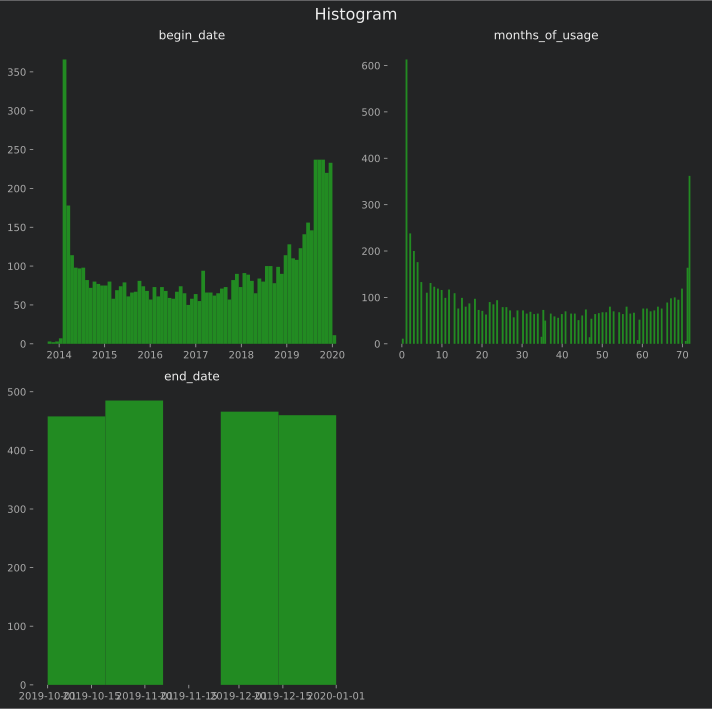

In [59]:
plot_hist(total_df.loc[: , [
        'begin_date',
        'months_of_usage',
        'end_date'
    ]])

Очень странно что только 4 даты когда абоненты прекратили пользоваться услугами…

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Скорее всего раньше в компании отток был незначительный и его просто не учитывали.
    
Но в последнее время отток стал заметным и решили его фиксировать ежемесячно
    
</div>

In [60]:
display(
    total_df['end_date'].describe(datetime_is_numeric=True)
)

count                             1869
mean     2019-11-15 21:31:18.009630976
min                2019-10-01 00:00:00
25%                2019-11-01 00:00:00
50%                2019-11-01 00:00:00
75%                2019-12-01 00:00:00
max                2020-01-01 00:00:00
Name: end_date, dtype: object

In [61]:
print(len(total_df['end_date'].unique()))

5


In [62]:
print(len(contract_df['end_date'].unique()))

5


In [63]:
print(total_df['end_date'].unique())

[                          'NaT' '2019-12-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000']


Для ползователей, которые закончили пользоваться услугами

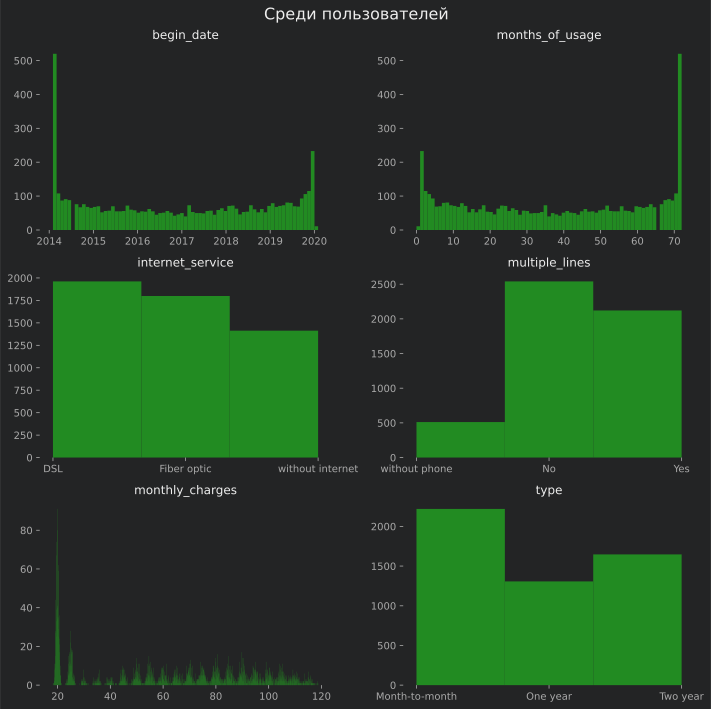

In [64]:
plot_hist(total_df.loc[total_df['target'] == 0, [
        'begin_date',
        'months_of_usage',
        'internet_service',
        'multiple_lines',
        'monthly_charges',
        'type'
    ]],
    title='Среди пользователей',
    color='forestgreen'
          
         )

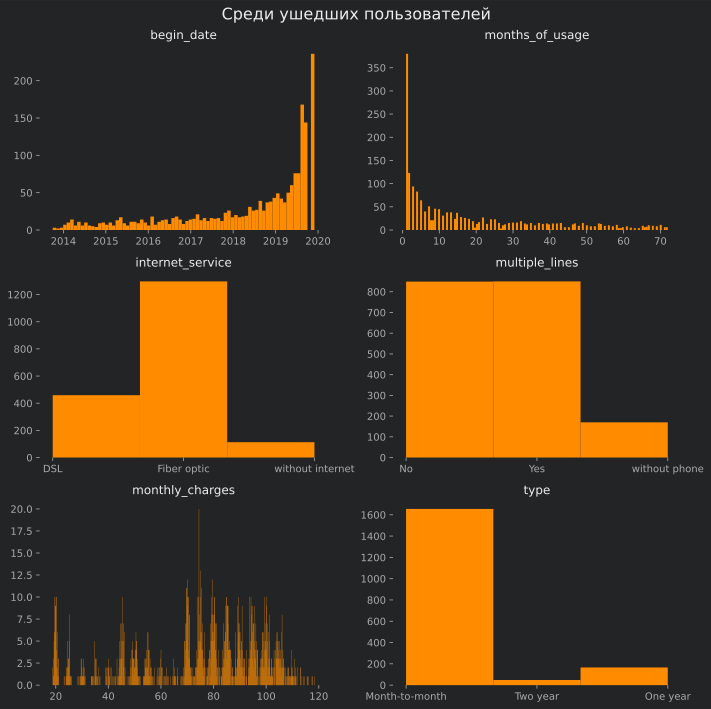

In [65]:
plot_hist(total_df.loc[total_df['target'] == 1, [
        'begin_date',
        'months_of_usage',
        'internet_service',
        'multiple_lines',
        'monthly_charges',
        'type'
    ]],
    title='Среди ушедших пользователей',
    color='darkorange'
         )

<a id="plot"></a>
[def compare_hist](#compare_hist)

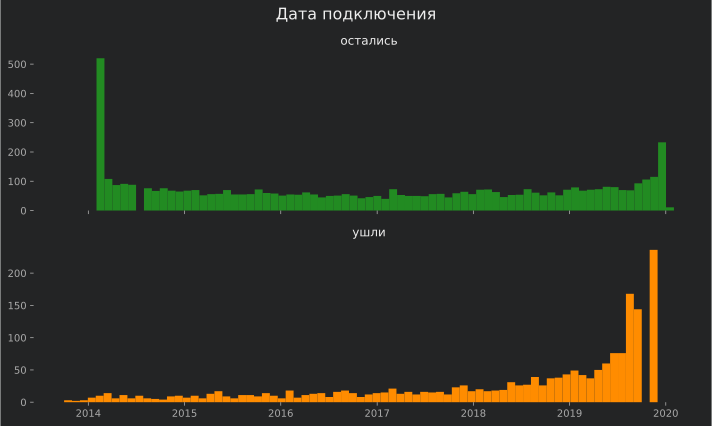

In [66]:
compare_hist(
    total_df.loc[: , ['begin_date', 'target']],
    title='Дата подключения'
)

После этого графика стало понятно откуда взялась задача выявить уходящих. В крайний год выборки их количество стало рости..

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> По всей видимости так и есть
    
</div>

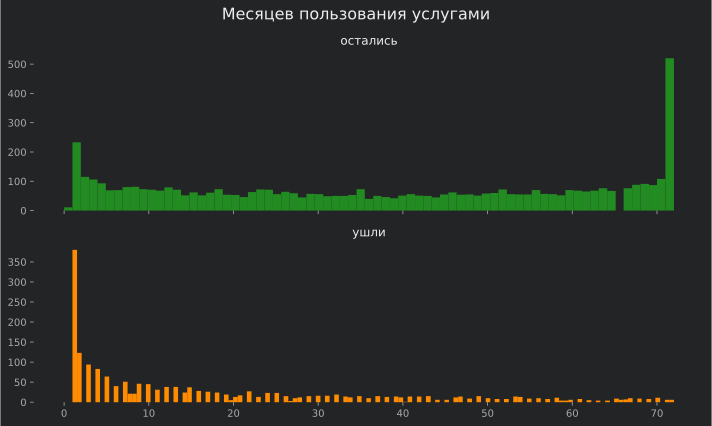

In [67]:
compare_hist(
    total_df.loc[: , ['months_of_usage', 'target']],
    title='Месяцев пользования услугами'
)

In [68]:
total_df.loc[total_df['target'] == 1, 'months_of_usage'].mode()

0    1.018555
Name: months_of_usage, dtype: float16

In [69]:
fst_month_leaving_idx = total_df.loc[
        (total_df['months_of_usage'] < 2)
        & (total_df['target'] == 1)
    ].index
few_year_leaving_idx = total_df.loc[
        (total_df['months_of_usage'] <= 24)
        & (total_df['target'] == 1)
    ].index
print(
    '{:.2%} пользователей ушли после первого месяца.'.format(
        len(fst_month_leaving_idx) / len(few_year_leaving_idx)
    ), '\nСреди тех кто ушёл и пользовался услугами два года и менее.'
)

28.55% пользователей ушли после первого месяца. 
Среди тех кто ушёл и пользовался услугами два года и менее.


Может это те кто пришёл по акции?  
«Первый месяц бесплатно» или «Первый месяц со скидкой…»  
В любом случае что+то их не устроило явно, раз за месяц они решили отказаться от услуг…

In [70]:
total_df.loc[fst_month_leaving_idx, 'monthly_charges'].describe()

count    380.000000
mean      58.197369
std       23.816448
min       18.850000
25%       43.787500
50%       69.375000
75%       75.512497
max      102.449997
Name: monthly_charges, dtype: float64

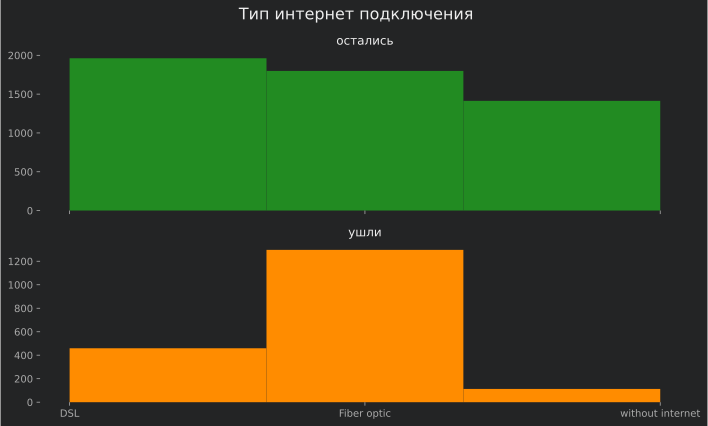

In [71]:
compare_hist(
    total_df.loc[: , ['internet_service', 'target']],
    title='Тип интернет подключения'
)

In [72]:
print('Среди {:} пользователей услуги интернет доступа:'.format(
            len(internet_df.index)
        ), end='\n\n'
)
      
about_categories(internet_df.describe())

Среди 5517 пользователей услуги интернет доступа:

56.12% Fiber optic internet_service
63.40% не используют online_security
55.97% не используют online_backup
56.10% не используют device_protection
62.95% не используют tech_support
50.93% не используют streaming_tv
50.48% не используют streaming_movies


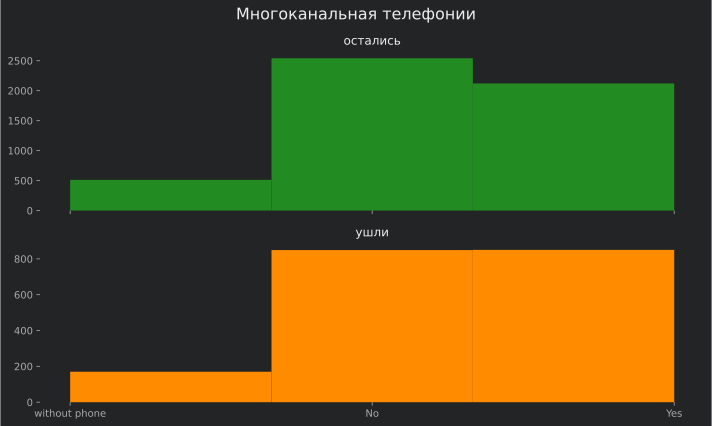

In [73]:
compare_hist(
    total_df.loc[: , ['multiple_lines', 'target']],
    title='Многоканальная телефонии'
)

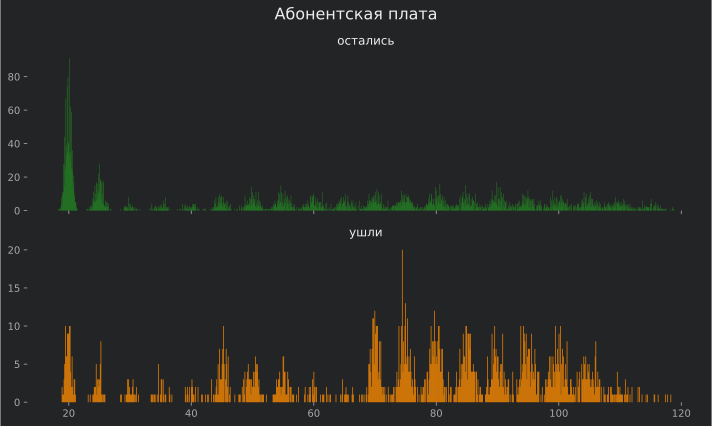

In [74]:
compare_hist(
    total_df.loc[: , ['monthly_charges', 'target']],
    title='Абонентская плата'
)

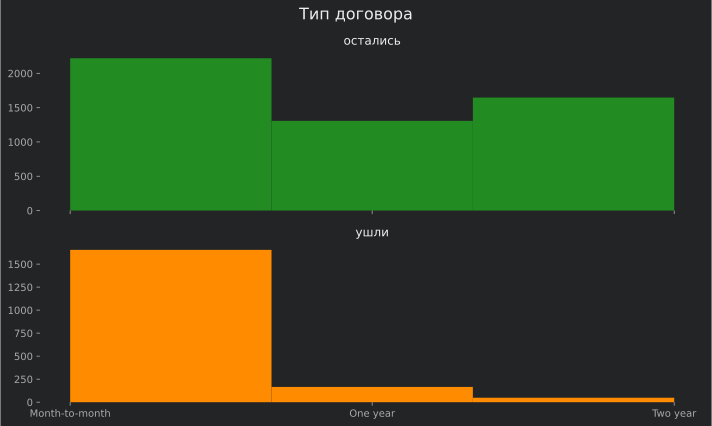

In [75]:
compare_hist(
    total_df.loc[: , ['type', 'target']],
    title='Тип договора'
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Алексей, хороший анализ данных, все понятно и очень подробно =)
    
Здорово, что подробно исследовал влияние признаков на отток!
    
Нужно только помнить, что влияние различных факторов на целевую переменную, это гипотеза, и нужно использовать методы проверки гипотез. Но это уже отдельная работа =)
    
</div>

Даты начала и окончания пользования услугами использовать для обучения модели не будем. Потомучто есть производный признак количество месяцев пользования..

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Правильно, что удаляешь признаки, связанные с датами!
    
</div>

In [76]:
total_df.drop(columns=['begin_date', 'end_date'], inplace=True)

In [77]:
phik_mtrx = total_df.phik_matrix()

interval columns not set, guessing: ['senior_citizen', 'monthly_charges', 'total_charges', 'months_of_usage', 'target']


In [78]:
display(phik_mtrx)

,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,months_of_usage,target
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009063,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
senior_citizen,0.000000,1.000000,0.016992,0.324576,0.086231,0.242133,0.292725,0.304853,0.149384,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.087925,0.028663,0.233432
partner,0.000000,0.016992,1.000000,0.652122,0.179736,0.013218,0.243008,0.203244,0.424467,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.086249,0.491658,0.232930
dependents,0.000000,0.324576,0.652122,1.000000,0.147680,0.172593,0.224903,0.184248,0.119077,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.011198,0.212209,0.253936
type,0.000000,0.086231,0.179736,0.147680,1.000000,0.106860,0.277462,0.388340,0.505826,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.244410,0.664660,0.251639
paperless_billing,0.000000,0.242133,0.013218,0.172593,0.106860,1.000000,0.370495,0.467827,0.207127,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.099953,0.000000,0.295754
payment_method,0.000000,0.292725,0.243008,0.224903,0.277462,0.370495,1.000000,0.399574,0.350566,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.174849,0.375115,0.449125
monthly_charges,0.009063,0.304853,0.203244,0.184248,0.388340,0.467827,0.399574,1.000000,0.762783,0.919008,0.551588,0.629450,0.667618,0.576328,0.835260,0.833427,0.710067,0.410964,0.360021
total_charges,0.000000,0.149384,0.424467,0.119077,0.505826,0.207127,0.350566,0.762783,1.000000,0.508222,0.545067,0.653989,0.671714,0.566062,0.660753,0.666609,0.493936,0.842146,0.278498
internet_service,0.000000,0.160702,0.000000,0.108463,0.505187,0.231438,0.323886,0.919008,0.508222,1.000000,0.241421,0.233602,0.232916,0.239663,0.272818,0.272782,0.739808,0.019357,0.196202


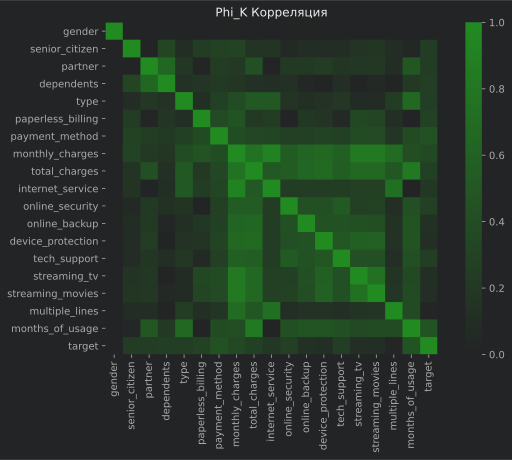

In [79]:
with mpl.rc_context(custom_params):
    
    plt.imshow(phik_mtrx, cmap=gr_wt_cmap)
    plt.xticks(rotation=90)
    plt.xticks(np.arange(len(total_df.columns)), total_df.columns)
    plt.yticks(np.arange(len(total_df.columns)), total_df.columns)
    plt.colorbar().outline.set_visible(False)
    plt.title('Phi_K Корреляция')
    plt.show()

In [80]:
for column in phik_mtrx.columns:
    idxs = phik_mtrx.loc[
            (phik_mtrx[column] <  1)
            & (phik_mtrx[column] > 0.7)
        ].index
    
    if len(idxs) > 0:
        print('Для', column)
        print('\t',
            idxs.values
        )

Для monthly_charges
	 ['total_charges' 'internet_service' 'streaming_tv' 'streaming_movies'
 'multiple_lines']
Для total_charges
	 ['monthly_charges' 'months_of_usage']
Для internet_service
	 ['monthly_charges' 'multiple_lines']
Для streaming_tv
	 ['monthly_charges' 'streaming_movies']
Для streaming_movies
	 ['monthly_charges' 'streaming_tv']
Для multiple_lines
	 ['monthly_charges' 'internet_service']
Для months_of_usage
	 ['total_charges']


Корреляции:
* `gender` → не коррелирует с `target`
* `months_of_usage` → `total_charges` 0.842175, это и понятно)
* `internet_service` → `monthly_charges` 0.918976

In [81]:
total_df.drop(columns=['gender'], inplace=True)

In [82]:
display(total_df.loc[:,
             ['total_charges', 'months_of_usage', 'monthly_charges']
    ].corr())

,total_charges,months_of_usage,monthly_charges
total_charges,1.000000,0.826111,0.651174
months_of_usage,0.826111,1.000000,0.247749
monthly_charges,0.651174,0.247749,1.000000


Создадим признак платёжной тенденции. Так можно будет перейти от `total_charges` к условному интересу пользователей к услугам. То есть если `payment_trend` > 0 можно предположить, что пользователь добавил услуги. Если `payment_trend` < 0 можно предположить, что пользователь перестал использовать часть услуг..

Так мы избавимся от:
* высокой корреляции `0.826096` между `total_charges` и `months_of_usage`
* корреляции выше среднего `0.651169` между `total_charges` и `monthly_charges`

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Согласен, это будет интересный признак для обучения
    
</div>

In [83]:
total_df['payment_trend'] = (np.round(total_df['months_of_usage']) * total_df['monthly_charges']) - total_df['total_charges']

In [84]:
total_df.drop(columns=['total_charges'], inplace=True)

In [85]:
display(total_df.sample(5))

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,months_of_usage,target,payment_trend
customer_id,,,,,,,,,,,,,,,,,,
2919-HBCJO,0,No,No,Month-to-month,Yes,Bank transfer (automatic),76.650002,Fiber optic,No,Yes,No,No,No,No,No,4.007812,1,-27.000000
9495-SKLKD,0,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.949997,Fiber optic,No,Yes,Yes,No,No,Yes,Yes,45.031250,0,-138.899902
3038-PQIUY,0,No,No,Month-to-month,Yes,Bank transfer (automatic),66.150002,DSL,Yes,Yes,Yes,No,No,No,Yes,38.000000,0,-8.699951
1552-TKMXS,0,Yes,No,Month-to-month,No,Credit card (automatic),20.350000,without internet,No,No,No,No,No,No,No,42.031250,0,-15.200012
2873-ZLIWT,0,Yes,Yes,Month-to-month,Yes,Electronic check,84.849998,Fiber optic,No,No,Yes,Yes,No,No,Yes,40.000000,1,90.949951


In [86]:
features = total_df.drop(columns='target')
targets = total_df['target'].values

In [87]:
features['senior_citizen'] = features['senior_citizen'].apply(
        lambda sc: 'Yes' if sc else 'No'
    )

In [88]:
features_train, features_test, targets_train, targets_test = train_test_split(
        features,
        targets,
        test_size=TEST_SIZE,
        random_state=RANDOM_SEED,
        shuffle=True,
        stratify=targets
    )

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Разделение на выборки выполнено правильно!
    
</div>

In [89]:
cat_features = [
        'senior_citizen',
        'partner',
        'dependents',
        'type',
        'paperless_billing',
        'payment_method',
        'internet_service',
        'online_security',
        'online_backup',
        'device_protection',
        'tech_support',
        'streaming_tv',
        'streaming_movies',
        'multiple_lines',
    ]

### CatBoostClassifier

In [90]:
params = {
    'iterations': 265,
    'loss_function': 'Logloss:hints=skip_train~true',
    # 'custom_metric': ['AUC:hints=skip_train~false', 'Accuracy'],
    'custom_metric': 'AUC:hints=skip_train~false',
    'random_seed': RANDOM_SEED,
    'learning_rate': 0.15,
    'early_stopping_rounds': 50,
    # 'use_best_model':True,
    'cat_features': cat_features,
}

In [91]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=targets_train, cat_features=cat_features),
    fold_count=4,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
    # plot=True, #Error displaying widget: model not found
    # stratified=True,
    verbose=50
)

Training on fold [0/4]
0:	test: 0.6056607	best: 0.6056607 (0)	total: 59.2ms	remaining: 15.6s
50:	test: 0.4049508	best: 0.4049508 (50)	total: 496ms	remaining: 2.08s
100:	test: 0.3873890	best: 0.3871835 (95)	total: 1.1s	remaining: 1.79s
150:	test: 0.3759191	best: 0.3751986 (142)	total: 1.61s	remaining: 1.21s
200:	test: 0.3700515	best: 0.3695660 (186)	total: 2.13s	remaining: 677ms
250:	test: 0.3652394	best: 0.3638777 (237)	total: 2.63s	remaining: 147ms
264:	test: 0.3657163	best: 0.3638777 (237)	total: 2.77s	remaining: 0us

bestTest = 0.3638777303
bestIteration = 237

Training on fold [1/4]
0:	test: 0.6101920	best: 0.6101920 (0)	total: 17.9ms	remaining: 4.72s
50:	test: 0.3747762	best: 0.3747762 (50)	total: 471ms	remaining: 1.98s
100:	test: 0.3462366	best: 0.3462366 (100)	total: 946ms	remaining: 1.54s
150:	test: 0.3364726	best: 0.3359053 (146)	total: 1.44s	remaining: 1.08s
200:	test: 0.3322001	best: 0.3306959 (189)	total: 1.92s	remaining: 612ms
250:	test: 0.3288817	best: 0.3286276 (248)	tot

In [92]:
cat_model = CatBoostClassifier(**params, verbose=100)

In [93]:
cat_scores = cross_validate(
    cat_model,
    features_train,
    targets_train,
    cv=5,
    scoring=('roc_auc', 'accuracy'),
)

0:	total: 15ms	remaining: 3.96s
100:	total: 926ms	remaining: 1.5s
200:	total: 1.87s	remaining: 596ms
264:	total: 2.47s	remaining: 0us
0:	total: 9.66ms	remaining: 2.55s
100:	total: 872ms	remaining: 1.42s
200:	total: 1.81s	remaining: 576ms
264:	total: 2.41s	remaining: 0us
0:	total: 9.65ms	remaining: 2.55s
100:	total: 885ms	remaining: 1.44s
200:	total: 1.85s	remaining: 591ms
264:	total: 2.46s	remaining: 0us
0:	total: 9.5ms	remaining: 2.51s
100:	total: 872ms	remaining: 1.42s
200:	total: 1.83s	remaining: 582ms
264:	total: 2.43s	remaining: 0us
0:	total: 9.65ms	remaining: 2.55s
100:	total: 894ms	remaining: 1.45s
200:	total: 1.85s	remaining: 589ms
264:	total: 2.54s	remaining: 0us


In [94]:
print('CatBoostClassifier')

print('%0.3f AUC-ROC со стандартным отклонением %0.3f'
      % (np.median(cat_scores['test_roc_auc']),
         cat_scores['test_roc_auc'].std())
)
print('%0.3f Accuracy со стандартным отклонением %0.3f'
      % (np.median(cat_scores['test_accuracy']),
         cat_scores['test_accuracy'].std())
)

CatBoostClassifier
0.897 AUC-ROC со стандартным отклонением 0.012
0.861 Accuracy со стандартным отклонением 0.013


In [95]:
display(cat_scores)

{'fit_time': array([3.62101412, 2.59594321, 2.66457343, 2.64444494, 2.74216008]),
 'score_time': array([0.01743412, 0.01682758, 0.01659584, 0.01744533, 0.01643896]),
 'test_roc_auc': array([0.87379159, 0.89684072, 0.91187868, 0.89978599, 0.89407447]),
 'test_accuracy': array([0.84200568, 0.8448439 , 0.87689394, 0.86268939, 0.86079545])}

In [96]:
cat_model.fit(
    features_train,
    targets_train,
    cat_features=cat_features,
    verbose=100
    # **params
)

0:	total: 13.6ms	remaining: 3.58s
100:	total: 1s	remaining: 1.63s
200:	total: 2.07s	remaining: 660ms
264:	total: 2.77s	remaining: 0us


In [97]:
features_train, features_test, targets_train, targets_test = train_test_split(
        features,
        targets,
        test_size=TEST_SIZE,
        random_state=RANDOM_SEED,
        shuffle=True,
        stratify=targets
    )

### OneHotEncoder

In [98]:
ohe = OneHotEncoder(
    drop='first',
    dtype=np.uint8,
    handle_unknown='error',
    # sparse=False
)

### Pipeline Prerocessing

In [99]:
num_features = list(
        set(features_train.columns)
        - set(cat_features)
    )


In [100]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ('encoder', ohe)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
    ]
)

### AdaBoostClassifier

In [101]:
ada_model = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=RANDOM_SEED,
)

In [102]:
ada_ppln = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', ada_model)]
)

In [103]:
ada_scores = cross_validate(
    ada_ppln,
    features_train,
    targets_train,
    cv=5,
    scoring=('roc_auc', 'accuracy'),
)

In [104]:
print('AdaBoostClassifier')

print('%0.3f AUC-ROC со стандартным отклонением %0.3f'
      % (np.median(ada_scores['test_roc_auc']),
         ada_scores['test_roc_auc'].std())
)
print('%0.3f Accuracy со стандартным отклонением %0.3f'
      % (np.median(ada_scores['test_accuracy']),
         ada_scores['test_accuracy'].std())
)

AdaBoostClassifier
0.859 AUC-ROC со стандартным отклонением 0.008
0.818 Accuracy со стандартным отклонением 0.003


### RandomForestClassifier

In [105]:
rfc_model = RandomForestClassifier(random_state=RANDOM_SEED)

In [106]:
rfc_ppln = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', rfc_model)]
)

### RandomizedSearchCV

In [107]:
param = {
    'classifier__max_depth': [6, 9, 12, 15, None], 
    'classifier__n_estimators': [70, 100, 150], 
    'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__bootstrap':[True, False],
    'classifier__min_samples_leaf': [1, 2, 3, 4 , 5],
} 

In [108]:
rnd_search = RandomizedSearchCV(
    estimator=rfc_ppln,
    param_distributions=param,
    n_iter =10,
    scoring='roc_auc',
    random_state=RANDOM_SEED,
    cv=5,
)
rnd_search.fit(features_train, targets_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['months_of_usage',
                                                                                'monthly_charges',
                                                                                'payment_trend']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              dtype=<class 'numpy.uint8'>))]),
                                                                               ['senior_citizen',
                                                                                'partner',
                                                                                'dependents',
                                                                                'type',
                                                                                'pap...
                                                                                'multiple_lines'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=270223))]),
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__criterion': ['gini',
                                                                  'entropy',
                                                                  'log_loss'],
                                        'classifier__max_depth': [6, 9, 12, 15,
                                                                  None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         3, 4,
                                                                         5],
                                        'classifier__n_estimators': [70, 100,
                                                                     150]},
                   random_state=270223, scoring='roc_auc')

In [109]:
display(rnd_search.best_params_)

{'classifier__n_estimators': 70,
 'classifier__min_samples_leaf': 3,
 'classifier__max_depth': 9,
 'classifier__criterion': 'gini',
 'classifier__bootstrap': True}

In [110]:
rfc_scores = cross_validate(
    rnd_search,
    features_train,
    targets_train,
    cv=5,
    scoring=('roc_auc', 'accuracy'),
)

In [111]:
print('RandomForestClassifier')

print('%0.3f AUC-ROC со стандартным отклонением %0.3f'
      % (np.median(rfc_scores['test_roc_auc']),
         rfc_scores['test_roc_auc'].std())
)
print('%0.3f Accuracy со стандартным отклонением %0.3f'
      % (np.median(rfc_scores['test_accuracy']),
         rfc_scores['test_accuracy'].std())
)

RandomForestClassifier
0.857 AUC-ROC со стандартным отклонением 0.007
0.816 Accuracy со стандартным отклонением 0.008


<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера v2:</b> Необходимо сделать вывод после обучения моделей, желательно также выделить подпункт Тестирование модели
    
В промежуточном выводе нужно написать, что среди рассмотренных моделей выбрали лучшую, с метрикой на кросс-валидации ROC-AUC = ...

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 03</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Добавил пункт выбор модели.</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера v3:</b> Хорошо
    
</div>

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера:</b> В целом работа практически завершена. Единственное, что нужно обязательно добавить:
    
- в одной из моделей сделать перебор хотя бы двух гиперпараметров. 
    
Можно использовать GridSearchCV, RandomizedSearchCV.
    
</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Добавил <code>RandomizedSearchCV</code>.</p>
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Напоминаю, что на тестовой выборке нужно проверить только одну лучшую модель. 

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Проверил на тесте <code>CatBoostClassifier</code>.</p>
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Как рекомендация, можно добавить визуализацию ROC-кривой и исследовать значимость признаков для лучшей модели! 
    
Так мы сможем увидеть, какие признаки слабо влияют на отток, и в принципе их можно вообще исключить из обучения, и сделать новую модель, отобрав только самые важные признаки. (Пересчитывать с новыми признаками не нужно).

Анализ важности признаков позволяет не только построить лучшую модель и уменьшить число признаков для обучения. Мы также можем выдать рекомендации бизнесу, изучив влияние признаков на отток, тем самым можно повысить качество определенных услуг, например онлайн-платежи или интернет на оптоволокне.

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
    <p class="mb-0"><strong>Комментари:</strong></p>
    <ul>
        <li><stroke>Добавлю график</stroke> <code>AUC-ROC</code>.</li>
        <li>Не совсем понял как исследовать значимость признаков для модели..</li>
    </ul>
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера v2:</b> Для оценки значимости признаков используется метод feature_importances_

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 03</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Спасибо, посмотрел на <code>feature_importances_</code>.</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Вот небольшие статьи по метрикам в машинном обучении, если заинтересует:

https://habr.com/ru/company/ods/blog/328372/ 
    
https://habr.com/ru/company/jetinfosystems/blog/420261/

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
    <p class="mb-0"><strong>Комментари:</strong></p>
    <p class="mb-0">Спасибо.</p>

</div>

### Выбор модели

`CatBoostClassifier` показал лучшее значение 0.897 AUC-ROC со стандартным отклонением 0.012 на тренировочной выборке.  
Выбираем `cat_model` для проверки и использования.

### Тест модели

In [112]:
cat_predict_prob = cat_model.predict_proba(features_test)[:, 1]

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера v2:</b> Нужно поправить расчет на тестовой выборке:
    
- для расчета метрики roc_auc мы должны брать вероятность принадлежности к целевому классу
    
    
    preds = best_model.predict_proba(X_test)[:, 1]
   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    
</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 03</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Проверил на тесте <code>CatBoostClassifier</code> через <code>predict_proba</code>.</p>
</div>

In [113]:
print(roc_auc_score(targets_test, cat_predict_prob))

0.9140018666287163


<div class="alert alert-success">
<b>✔️ Комментарий ревьювера v3:</b> Отличный результат на тестовой выборке, поздравляю!
    
</div>

✨

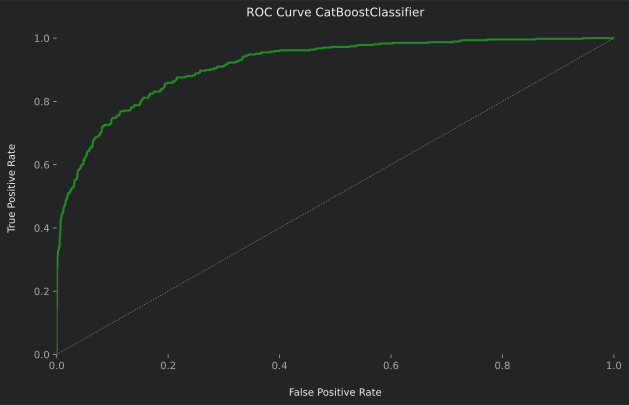

In [114]:
with mpl.rc_context(custom_params):
    fpr, tpr, _ = roc_curve(
            targets_test,
            cat_model.predict_proba(features_test)[:,1],
            pos_label=1
        )
    plt.plot(fpr, tpr, label='ROC Curve', color='forestgreen',  linewidth=2,)
    plt.plot([0, 1], [0, 1], color='grey', linestyle=':', linewidth=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve CatBoostClassifier')
    plt.show()

In [115]:
display(
    np.around(pd.DataFrame(
            data=cat_model.feature_importances_,
            index=cat_model.feature_names_,
            columns=['feature_importances']
    ).sort_values(by='feature_importances'), 2)
)

,feature_importances
partner,0.91
senior_citizen,0.95
streaming_tv,1.01
online_backup,1.06
device_protection,1.11
tech_support,1.24
dependents,1.28
paperless_billing,1.57
online_security,1.60
streaming_movies,1.90


Получается, что наименьшее влияние на предсказание модели оказывают:
- `online_backup` 	0.711326
- `partner` 	0.800222
- `streaming_tv` 	0.894987
- `device_protection` 	0.937428

<hr>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера v2:</b> Нужно также написать небольшой вывод на данном этапе проекта: 
    
- какую модель с гиперпараметрами выбрали и какая метрика получилась
    
Метрика должна быть > 0.85
    
После этого я готов принять проект и можно будет приступать к отчету

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 03</span>
    <p class="mb-0"><strong>Исправления:</strong></p>
    <p>Добавил небольшой вывод.</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера v3:</b> Хорошо, все замечания поправлены!
    
</div>

### Вывод

Рассмотрели модели и получили AUC-ROC:
- `RandomForestClassifier` 0.856 со стандартным отклонением 0.008
- `LogisticRegression` 0.859 со стандартным отклонением 0.009
- `CatBoostClassifier` **0.897** со стандартным отклонением 0.012

Выбрали `CatBoostClassifier` который на тестовой выборке оправдал ожидания.  
Получили AUC-ROC = 0.914.

<hr>

<font color=blue>
<b> ✔️ 👍Заключение ревьювера:</b> Алексей, у тебя очень хорошая работа и практически завершена! 
    
В целом тебе удалось справиться с выпускным проектом, поздравляю! Данные из разных таблиц собраны в один датафрейм, удалены аномалии, заполнены пропуски, получены новые признаки, а ненужные признаки удалены. Рассмотрено несколько моделей и сделан перебор параметров. Могу отметить самостоятельность и аналитический подход в выполнении проекта!
   
Положительные моменты: 
    
- грамотное и понятное оформление кода;
    
- аналитический подход — исследованы гистограммы распределения признаков;
    
- выполнен анализ корреляции признаков;
    
- новые признаки сгенерированы правильно, лишние удалены.
    
Сейчас есть несколько важных замечаний:
   
- добавить перебор гиперпараметров;
    
- посчитать метрику на тестовой выборке для лучшей модели.
    
На данном этапе проект практически завершен, я также отметил рекомендации. У нас еще есть время — я отправлю проект, чтобы ты мог ознакомиться с проверкой, внести изменения и возможно задать вопросы =)
    
Также на будущее стоит иметь ввиду, что метрика ROC-AUC является не единственной, всегда нужно прислушиваться к требованиями бизнеса. Обычно одной метрикой не ограничиваются, смотрят также Precision, Recall, и выбирают те, которые наиболее подходят для конкретных задач. 
    
Еще нужно смотреть на важность признаков в модели, чтобы понимать, какие параметры влияют на отток.
    
Проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также аналитические методы проверки гипотез.
    
</font>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера v3:</b> Алексей, поздравляю с выполнением основной части проекта! 
    
Пожалуйста, сохрани наши с тобой комментарии, а отчет продолжай выполнять ниже, в этом файле Jupyter Notebook.
    
В отчете не забудь указать все пункты по предобработке данных, параметрам модели, набору признаков для обучения — чтобы была возможность воспроизвести твою работу, изучив только отчет.
    
Необходимо выделить следующие пункты:
    
- список признаков, которые использовались для обучения;
    
- указать итоговую модель и ее гиперпараметры — желательно в отдельной строке, чтобы не сливалась с остальным текстом;
    
- отличия от исходного плана работ;
    
- в отчете нужно указать трудности в работе (если не было, то так и написать) и ключевые этапы (если ключевых этапов не было, то написать, что все этапы важны);
    
- размер тестовой выборки, параметр random_state.

Я принимаю работу и буду ждать твой отчет на проверку!
    
</div>

## Отчет

Здача этого учебного проекта:
Создать модель для поиска, `классификации` пользователей, которые могут прекратить пользоваться услугами связи **«Ниединогоразрыва.ком»**.

Для чего сделаны следущие шаги:

### Основные этапы

0. **основные константы**  
   + **RANDOM_SEED = 270223** для `random_state`  
   + **TEST_SIZE = 0.25** размер тестовой выборки  
   + **UPDATED_AT = np.datetime64('2020-02-01')** дата выгрузки данных
1. **загрузили и проверили данные**  
   1.1. загрузили наборы данных `contract.csv`, `internet.csv`, `personal.csv`, `phone.csv`.
      + **названия колонок изменили на `snake_case`**  
      + данные о **7043** пользователях  
      + даты подключения абонентов от `2013-10-01` до `2020-02-01`
      + явных дубликатов в наборах данных нет  
      + пропусков `NaN` в наборах данных нет  
      + согласно `end_date` **1869** пользователей прекратили пользоваться услугами компании  
      + у пользователей, которые подключились в месяц выгрузки данных `total_charges` «пусто»; такие значения прировняли **0**  
2. **сновная часть проекта**  
   2.0. индексами наборов данных назначили `customer_id`  
   2.1. **объединили наборы данных в один**  
   2.2. предобработка и исследовательский анализ данных  
      + заполнили пропуски, которые появились после объединения наборов данных:  
         + `NaN` в **`internet_service`** = `'without internet'`  
         + `NaN` в **`online_security`** = `'No'`  
         + `NaN` в **`online_backup`** = `'No'`  
         + `NaN` в **`device_protection`** = `'No'`  
         + `NaN` в **`tech_support`** = `'No'`  
         + `NaN` в **`streaming_tv`** = `'No'`  
         + `NaN` в **`streaming_movies`** = `'No'`  
         + `NaN` в **`multiple_lines`** = `'without phone'`  
      + создали новый признак → `months_of_usage` → колличество месяцев которое абонент пользуется услугами:
         + `months_of_usage` = `UPDATED_AT` - `begin_date` для тех кто **пользуется**  
         + `months_of_usage` = `end_date` - `begin_date` для тех кто **закончил** сотрудничество  
      + создали **целевой** признак `target` из `end_date`; 1 → абонент **закончил** сотрудничество  
      + посмотрели на Фи коэффициент корелляции  
         + `gender` → не коррелирует с `target` phi_k = 0.000000  
         + `months_of_usage` → `total_charges` phi_k = 0.842175  
      + удалили признак `gender`
      + создали признак платёжной тенденции `payment_trend`&nbsp;=&nbsp;(`months_of_usage`&nbsp;*&nbsp;`monthly_charges`)&nbsp;-&nbsp;`total_charges`  
      + удалили признак `total_charges`
      + перевели значения `senior_citizen` из **`[1, 0]`** в **`['Yes', 'No']`**  
      + построили гистограммы для ушедших и оставшихся пользователей  
      + посмотрели на статистику, [подробнее](#statistics)

      
   2.3. **обучение и кросс+валидация моделей**  
      + **CatBoostClassifier**  
         + нашли гиперпараметр `iterations` с помощью `CatBoost.cv`:      
            + `iterations = 265`  
            + `loss_function = 'Logloss:hints=skip_train~true'`  
            + `custom_metric = 'AUC:hints=skip_train~false'`  
            + `learning_rate = 0.15`  
            + `cat_features =`  
               + `['senior_citizen',`  
               + `'partner',`  
               + `'dependents',`  
               + `'type',`  
               + `'paperless_billing',`  
               + `'payment_method',`  
               + `'internet_service',`  
               + `'online_security',`  
               + `'online_backup',`  
               + `'device_protection',`  
               + `'tech_support',`  
               + `'streaming_tv',`  
               + `'streaming_movies',`  
               + `'multiple_lines']`
         + посчитали метрики с помощью `cross_validate`:
            + **0.897 AUC-ROC** со стандартным отклонением 0.012  
            + **0.861 Accuracy** со стандартным отклонением 0.013  
      + сделали **`Pipeline`** для AdaBoostClassifier и RandomForestClassifier, применили `ColumnTransformer`:  
         + `StandardScaler` для числовых
         + `OneHotEncoder` для категориальных, параметры:  
            + `drop='first'`,
            + `dtype=np.uint8`,
            + `handle_unknown='error'`,

      + **AdaBoostClassifier**  
         + гиперпараметры:
            + `n_estimators=50`,
            + `learning_rate=1.0`,
            + `algorithm='SAMME.R'`,
        + посчитали метрики с помощью `cross_validate`:  
            + **0.859 AUC-ROC** со стандартным отклонением 0.008  
            + **0.818 Accuracy** со стандартным отклонением 0.003  
      + **RandomForestClassifier**  
        + нашли гиперпараметры с помощью `RandomSearchCV`:  
           + `n_estimators = 70`  
           + `min_samples_leaf = 3`  
           + `max_depth = 9`  
           + `criterion = 'gini'`  
           + `bootstrap = True`  
        + посчитали метрики с помощью `cross_validate`:
           + **0.857 AUC-ROC** со стандартным отклонением 0.007  
           + **0.816 Accuracy** со стандартным отклонением 0.008  

   2.4. **выбор лучшей модели**  
      + `CatBoostClassifier` показал лучшее значение 0.897 AUC-ROC на тренировочной выборке; выбрали `cat_model` для проверки и использования.  
   
   2.5. **тестирование CatBoostClassifier**  
      + **0.914 AUC-ROC** результат на тестовой выборке  
       

### Итоговая модель

**`CatBoostClassifier`**:  
**0.897 AUC-ROC** результат на **тренировочной** выборке  
**0.914 AUC-ROC** результат на **тестовой** выборке  
  
**гиперпараметры**:  
  + `iterations = 265`  
  + `loss_function = 'Logloss:hints=skip_train~true'`  
  + `custom_metric = 'AUC:hints=skip_train~false'`  
  + `learning_rate = 0.15`  
  + `cat_features =`  
     + `['senior_citizen',`  
     + `'partner',`  
     + `'dependents',`  
     + `'type',`  
     + `'paperless_billing',`  
     + `'payment_method',`  
     + `'internet_service',`  
     + `'online_security',`  
     + `'online_backup',`  
     + `'device_protection',`  
     + `'tech_support',`  
     + `'streaming_tv',`  
     + `'streaming_movies',`  
     + `'multiple_lines']`

<span id="statistics"></span>
### О данных

**28.55%** пользователей ушли после первого месяца.  
Среди тех кто пользовался услугами два года и менее и ушёл.

**Среди 7043 абонентов**:

**24.07%** заключили договор на два года  
**20.91%** заключили договор на год  
**55.02%** заключили договор помесячной оплаты  

**9.68%** абонентов не пользуются телефонией  
**21.67%** абонента не пользуются интернетом  

#### 5 параметров с наименьшим влиянием на целевую пременную

partner **0.91%**  
senior_citizen **0.95%**  
streaming_tv **1.01%**  
online_backup **1.06%**  
device_protection **1.11%**  

#### 5 параметров с наибольшим влиянием на целевую пременную

payment_method **5.04%**  
payment_trend **9.09%**  
monthly_charges **9.83%**  
type **10.35%**  
months_of_usage **45.14%**  

### Oтличия от исходного плана работ

Отличие в деталях) Общее направление совпадает.

### Трудности в работе

+ мало времени  
+ долго разбирался с `Pipeline` и `ColumnTransformer`  
+ долго разбирался с `matplotlib` и градиентной `cmap`  
+ не успел разобраться как по колличественной оценке `feature_importances_` выбрать ненужные параметры..

1. загрузили и проверили данные  
    1.1. загрузили наборы данных `contract.csv`, `internet.csv`, `personal.csv`, `phone.csv`.  
    1.2. 
       

<hr>

>✍️ Основные тезисы вводной консультации:
> - фиксируем параметр RANDOM_STATE = 270223 (дата начала финального спринта);
> - дедлайн сдачи отчета 11 марта 23:59 по мск (вторая суббота);
> - размер тестовой выборки: test_size = 0.25 (строго!!!);
> - рекомендуется использовать OneHotEncoder для кодирования категориальных признаков. Кодируем после разделения на train и test, чтобы не было утечки в данных;
> - если при кодировании используется get_dummies, то нужно сравнить списки получившихся признаков (должно быть полное совпадение);
> - помимо основной части, в проекте нужно сделать визуализацию графиков, исследовать корреляцию признаков. Для числовых признаков используем корреляцию Спирмена, для категориальных - Крамера. Можно применять инструмент фи-корреляции для смешанного набора признаков (библиотека phik);
> - для линейных моделей нужно масштабировать числовые признаки;
> - про баланс классов: Upsampling использовать не нужно (!!!), лучше используйте балансировку классов внутри модели;
> - на выборке test проверяется только одна лучшая модель, а сравнение моделей делаем с использованием кросс-валидации.
  
© Арсен Абдулин

🔗 [Exploratory Data Analysis with Pandas Profiling](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3)